In [41]:
import numpy as np
from scipy.stats import ortho_group  # Requires version 0.18 of scipy
from numpy import linalg as LA
import pandas as pd

In [3]:
% matplotlib inline


# Create a random correlation Matrix with specific eigen values

In [21]:
# normalization of the eigenvalues to have a trace(Matrix) = n, with n is the  size of the matrix ()
#  => because the correlation matrix trace remains invariant by the diagonalization

def normalaized_eigenvalues (input_eigenvalues):
    n = len(input_eigenvalues)
    return  n * input_eigenvalues / np.sum(input_eigenvalues)

# generate a random symmetric matrix with specific eigenvalues
def generate_wge(eigenvalues):
    n = len(eigenvalues)
    ortho_matrix = ortho_group.rvs(dim=n)
    diag_matrix = np.diag(eigenvalues)
    return ortho_matrix.T.dot(diag_matrix).dot(ortho_matrix)
# Givens rotation, to it will be used to transform the matrix in generate_corr_wse function, to have 1's in diagonal

def givens(M, i, j):
    G = M
    Mii, Mij, Mjj = M[i,i], M[i,j], M[j,j]
    t = (Mij + np.sqrt(Mij**2 - (Mii-1)*(Mjj-1))) /(Mjj - 1)
    c = 1. / np.sqrt(1+t**2)
    s = c*t
    Mi, Mj = M[i], M[j]
    G[i], G[j] = c*Mi - s*Mj, s*Mi + c*Mj
    Mi, Mj = G[:,i], G[:,j]
    G[:,i], G[:,j] = c*Mi - s*Mj, s*Mi + c*Mj
    return G
    
def generate_corr_wse(eigs):
    n = len(eigs)
    eigen = normalaized_eigenvalues (eigs)
    print(" normalized eigenvalues are : ", eigen )
    corr = generate_wge(eigen)
    precision = 0.01
    converg = 0
    i = 0
    while(not converg):
        vec = np.diagonal(corr)
        if np.sum(abs(vec-1)>precision)==0:
            converg = 1
        else:
            bigger = np.arange(len(vec))[(vec>1)]
            smaller = np.arange(len(vec))[(vec<1)]
            i,j = smaller[0], bigger[-1]
            if i>j:
                i,j = bigger[0], smaller[-1]
            corr = givens(corr, i, j)
            corr[i,i]=1
    return corr
def get_random_eigen_values (min,max,size):
     return np.random.randint(min,max,size)

# Some Tests 

In [22]:
# Generate a symmetric matrix with specific eigen values
a = generate_wge([1,2,3])
a

array([[ 2.41346484, -0.58732882, -0.06825618],
       [-0.58732882,  2.00027155,  0.69232971],
       [-0.06825618,  0.69232971,  1.58626361]])

In [29]:
# diagonalized matrix
LA.eig(a)[0]

array([3., 2., 1.])

In [32]:
a = generate_corr_wse(np.array([5,4,3]))

 normalized eigenvalues are :  [1.25 1.   0.75]


In [33]:
LA.eig(a)[0]

array([0.75, 1.25, 1.  ])

In [9]:
generate_wge([1,2,3])

array([[ 2.71547166, -0.41310517, -0.41626587],
       [-0.41310517,  1.12426291, -0.06178004],
       [-0.41626587, -0.06178004,  2.16026543]])

In [19]:
a = generate_corr_wse(np.array([5,4,3]))
a

 normalized eigenvalues are :  [1.25 1.   0.75]


array([[ 1.00000000e+00, -7.29173880e-02, -4.70110062e-16],
       [-7.29173880e-02,  1.00000000e+00, -2.39129786e-01],
       [-4.54497551e-16, -2.39129786e-01,  1.00000000e+00]])

In [62]:
generate_corr_wse(get_random_eigen_values (0,10,3))

 normalized eigenvalues are :  [1.23529412 1.41176471 0.35294118]


array([[ 1.        , -0.38933062, -0.23981311],
       [-0.38933062,  1.        , -0.33572406],
       [-0.23981311, -0.33572406,  1.        ]])

# Simalting Data from a correlation Matrix 

In [ ]:
# Data_parameters 
num_variables
# ratio_q= 
ratio_q =
num_samples = 2000


# The desired mean values of the sample.
mu = np.array([5.0, 0.0, 10.0])

# The desired covariance matrix.
r = generate_corr_wse(get_random_eigen_values (0,10,180))

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=num_samples)
df = pd.DataFrame(y)


In [53]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 2000

# The desired mean values of the sample.
mu = np.array([5.0, 0.0, 10.0])

# The desired covariance matrix.
r = generate_corr_wse(get_random_eigen_values (0,10,180))

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=num_samples)
df = pd.DataFrame(y)


 normalized eigenvalues are :  [1.92857143 0.21428571 0.85714286]


In [60]:
y.T.shape

(3, 2000)

In [54]:
r

array([[ 1.        , -0.21442942,  0.77888226],
       [-0.21442942,  1.        , -0.31202957],
       [ 0.77888226, -0.31202957,  1.        ]])

In [61]:
np.corrcoef(y.T)

array([[ 1.        , -0.2007415 ,  0.7770185 ],
       [-0.2007415 ,  1.        , -0.27716901],
       [ 0.7770185 , -0.27716901,  1.        ]])

In [55]:
df.corr()

,0,1,2
0,1.000000,-0.200742,0.777019
1,-0.200742,1.000000,-0.277169
2,0.777019,-0.277169,1.000000


In [50]:
df = pd.DataFrame(y)

In [43]:
df

,0,1,2
0,6.045916,2.349009,9.094163
1,3.080840,3.028084,11.342436
2,3.136476,-0.540207,11.026878
3,2.640174,1.445600,11.048353
4,8.613134,-1.919974,8.196572
5,4.118461,-0.215154,10.722009
6,6.850787,-0.319419,8.861068
7,5.989150,-0.560716,9.723047
8,5.991146,-1.252356,9.197092
9,3.371414,1.898397,10.997089


In [44]:
df.corr()

,0,1,2
0,1.000000,-0.612674,-0.982789
1,-0.612674,1.000000,0.560523
2,-0.982789,0.560523,1.000000


In [40]:
y

array([[ 6.04591555,  2.34900943,  9.09416256],
       [ 3.08083992,  3.02808421, 11.3424363 ],
       [ 3.13647607, -0.54020728, 11.02687769],
       [ 2.64017412,  1.44559991, 11.04835338],
       [ 8.6131345 , -1.91997374,  8.19657194],
       [ 4.11846139, -0.21515359, 10.72200905],
       [ 6.85078718, -0.31941862,  8.86106799],
       [ 5.98915009, -0.56071614,  9.72304737],
       [ 5.99114563, -1.25235569,  9.19709176],
       [ 3.37141423,  1.89839698, 10.99708941],
       [ 1.69472439,  6.10471039, 11.78775421],
       [ 6.3372102 , -1.36983564,  9.40401965],
       [ 1.60122621,  0.47779742, 12.0738508 ],
       [ 4.22867227,  0.50657321, 10.35473571],
       [ 4.78240159, -1.37335302, 10.18998961],
       [ 7.53717541, -3.06467837,  8.51224057],
       [ 2.98373504,  1.87171636, 10.97680354],
       [ 7.30505512, -2.37678952,  8.92229295],
       [ 4.81853956, -4.22970186, 10.05234112],
       [ 6.20404687,  1.62149686,  8.86791646]])

In [52]:
np.diag(np.array([4,2,1]))

array([[4, 0, 0],
       [0, 2, 0],
       [0, 0, 1]])

In [54]:
LA.eig(generate_wge([4,2,1]))[0]

array([4., 2., 1.])

In [46]:
LA.eig(np.array([[ 20.95383809,  -6.3073407,  -17.32919109],
 [ -6.3073407,   27.23848074,  20.84595533],
 [-17.32919109,  20.84595533 , 30.00429532]]))[0]

array([57.59690196, 17.40454622,  3.19516597])

In [60]:
LA.eig(generate_corr_wse(np.array([4,2,1])))[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [30]:
test = np.array([1,2,3])

In [33]:
3*test/np.sum(test)

array([0.5, 1. , 1.5])

In [20]:
m = get_random_matrix ([4,2,1])

In [21]:
m

array([[ 2.19131114, -0.20842116, -0.99970417],
       [-0.20842116,  2.2269138 ,  1.11529197],
       [-0.99970417,  1.11529197,  2.58177506]])

In [23]:
givens(m, 2, 2)

array([[ 2.19131114, -0.2595616 , -1.26953361],
       [-0.2595616 ,  3.4538276 ,  1.76384288],
       [-1.26953361,  1.76384288,  4.16355012]])

In [17]:
def givens(M, i, j):
    G = M
    Mii, Mij, Mjj = M[i,i], M[i,j], M[j,j]
    t = (Mij + np.sqrt(Mij**2 - (Mii-1)*(Mjj-1))) /(Mjj - 1)
    c = 1. / np.sqrt(1+t**2)
    s = c*t
    Mi, Mj = M[i], M[j]
    G[i], G[j] = c*Mi - s*Mj, s*Mi + c*Mj
    Mi, Mj = G[:,i], G[:,j]
    G[:,i], G[:,j] = c*Mi - s*Mj, s*Mi + c*Mj
    return G

In [16]:
LA.eig(get_random_matrix ([4,2,1]))[0]

array([4., 2., 1.])

In [7]:
m = ortho_group.rvs(dim=3)


In [ ]:
np.diag([4,2,1])

In [8]:
m

array([[ 0.4602099 , -0.51083579, -0.72612234],
       [-0.74560827, -0.66637391, -0.00375786],
       [-0.48194933,  0.54313222, -0.68755526]])

In [10]:
m.T.dot(m)

array([[ 1.00000000e+00, -3.66026166e-17, -2.55106808e-17],
       [-3.66026166e-17,  1.00000000e+00,  5.72056883e-17],
       [-2.55106808e-17,  5.72056883e-17,  1.00000000e+00]])

# Problem observation

In [6]:
def givens(M, i, j):
    G = M
    Mii, Mij, Mjj = M[i,i], M[i,j], M[j,j]
    t = (Mij + np.sqrt(Mij**2 - (Mii-1)*(Mjj-1))) /(Mjj - 1)
    c = 1. / np.sqrt(1+t**2)
    s = c*t
    Mi, Mj = M[i], M[j]
    G[i], G[j] = c*Mi - s*Mj, s*Mi + c*Mj
    Mi, Mj = G[:,i], G[:,j]
    G[:,i], G[:,j] = c*Mi - s*Mj, s*Mi + c*Mj
    return G

In [10]:
def generate_corr_wse(eigs):
    n = len(eigs)
    eigen = n * eigs / np.sum(eigs)
    corr = generate_wge(eigen)
    precision = 0.1
    converg = 0
    i = 0
    while(not converg):
        vec = np.diagonal(corr)
        if np.sum(abs(vec-1)>precision)==0:
            converg = 1
        else:
            bigger = np.arange(len(vec))[(vec>1)]
            smaller = np.arange(len(vec))[(vec<1)]
            i,j = smaller[0], bigger[-1]
            if i>j:
                i,j = bigger[0], smaller[-1]
            corr = givens(corr, i, j)
            corr[i,i]=1
    return corr

In [11]:
generate_corr_wse([3,2,1])

NameError: name 'generate_wse' is not defined

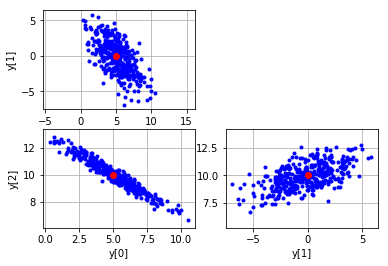

In [9]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 400

# The desired mean values of the sample.
mu = np.array([5.0, 0.0, 10.0])

# The desired covariance matrix.
r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=num_samples)


# Plot various projections of the samples.
plt.subplot(2,2,1)
plt.plot(y[:,0], y[:,1], 'b.')
plt.plot(mu[0], mu[1], 'ro')
plt.ylabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(y[:,0], y[:,2], 'b.')
plt.plot(mu[0], mu[2], 'ro')
plt.xlabel('y[0]')
plt.ylabel('y[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(y[:,1], y[:,2], 'b.')
plt.plot(mu[1], mu[2], 'ro')
plt.xlabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.show()